In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import numpy as np
from skimage.io import imread, imshow, imsave
from skimage.feature import blob_doh
from skimage.color import rgb2gray
from skimage.transform import resize
from glob import glob
import os
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
%matplotlib inline

In [3]:
trainlabel = pd.read_csv('../Data/train.csv')

In [4]:
whaleIDset = set(trainlabel['whaleID'])

In [5]:
print(len(whaleIDset), len(trainlabel))

(447, 4544)


In [29]:
im1 = imread('../../BigData/kaggle-right-whale/imgs_subset/w_300.jpg')

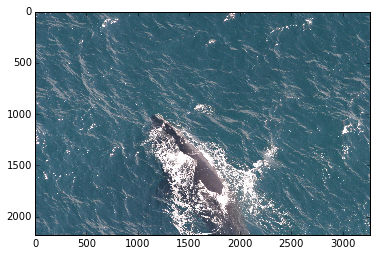

In [30]:
imshow(im1)

In [17]:
image_gray = rgb2gray(im1)

In [25]:
blobs_doh = blob_doh(image_gray, max_sigma=300, threshold=0.1, min_sigma=2)

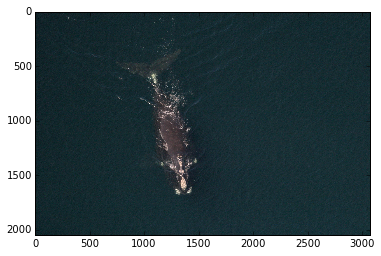

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.imshow(im1, interpolation='nearest')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

In [40]:
im2 = resize(im1,(200,300,3))

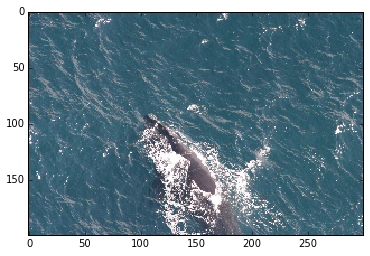

In [41]:
imshow(im2)

In [43]:
files = glob('../../BigData/kaggle-right-whale/imgs/*jpg')

In [48]:
for file in files:
    im1 = imread(file)
    imsmall = resize(im1, (200,300,3))
    splitfile = os.path.splitext(file)
    fsmall = splitfile[0] + '_small' + splitfile[1]
    imsave(fsmall, imsmall)

### Make the training set

In [7]:
dloc = '../../BigData/kaggle-right-whale/imgs/'

In [8]:
#features = []
#for image in trainlabel['Image']:
#    dfile = dloc + image
#    splitfile = os.path.splitext(file)
#    fsmall = splitfile[0] + '_small' + splitfile[1]
#    imdata = imread(fsmall)
#    features.append(imdata.flatten())
features = []
foundlist = []
files = glob(dloc + '*_small.jpg')
for i in range(len(files)):
    si = str(i)
    tailloc = 'w_' + si + '_small.jpg'
    dfile = dloc + tailloc
    if 'w_' + si + '.jpg' in trainlabel['Image'].values and dfile in files:
        imdata = imread(dfile)
        features.append(imdata.flatten())
        trainlabelindex = trainlabel['Image'].values == 'w_' + si + '.jpg'
        trainlabelvalue = trainlabel['whaleID'].values[trainlabelindex][0]
        foundlist.append(trainlabelvalue)

In [9]:
features = np.array(features)

In [10]:
features.shape

(4543, 180000)

In [11]:
vectorizer = CountVectorizer(min_df=1)

In [12]:
X = features
y = vectorizer.fit_transform(foundlist).toarray()

In [13]:
y.shape

(4543, 447)

In [61]:
clf = RandomForestClassifier()

In [ ]:
scores = cross_val_score(clf, X, y, cv=5)
print(scores, scores.mean(), scores.std())

In [11]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
test = pd.read_csv(dloc + 'test.csv')

In [14]:
Xtest = test

In [15]:
ypredict = clf.predict(Xtest)

In [16]:
ypredict

array([2, 0, 9, ..., 3, 9, 2])

In [17]:
dfpredict = pd.DataFrame(ypredict)

In [22]:
dfpredict.columns = ['Label']

In [26]:
dfpredict['ImageId'] = np.arange(28000) + 1

In [27]:
dfpredict.to_csv(dloc + 'predict_RFbenchmark.csv', index=False)